### Learning Rate Schedulers
Two different kinds of learning rate schedulers are discussed here: (i) keras default decay and (ii) polynomial decay. 

As we know that starting with a high learning rate is good to take big jumps in the loss landscape and then, slowly 
decrease the learning rate so that it converges to the local/global minima. These high LR and min LR can be simply found by exploring various learning rates. It is assumed that you have found out those LRs already. 

Purpose of this jupyter notebook is to plot the schedulers and to see if they go down to the min LR. 

In [41]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
%matplotlib inline

In [43]:
# configuration parameters 
TRAIN_SAMPLES = 1600
BATCH_SIZE = 64
EPOCHS = 20
INIT_LR = 0.01

In [44]:
# three sets of learning rate decays which can be used along with SGD optimizer 
class PolynomialDecay():
    """ polynomial decay of the learning rate. Note: if power = 1 then it is a linear decay """
    def __init__(self, maxEpochs=EPOCHS, initLR=INIT_LR, power=1.0):
        self.maxEpochs = maxEpochs 
        self.initLR = initLR 
        self.power = power 
        self.epochs = []
        self.lrs = []
        
    def __call__(self, epoch):
        """ compute the new learning rate based on polynomial decay """
        decay = (1 - (epoch / float(self.maxEpochs))) ** self.power 
        lr = self.initLR * decay
        
        # save the epochs and lrs for plotting 
        self.epochs.append(epoch)
        self.lrs.append(lr)
        
        return float(lr)
    
    def plot(self):        
        plt.style.use("ggplot")
        plt.figure()
        plt.plot(self.epochs, self.lrs)
        plt.title(f"Polynomial LR Scheduler with {self.power} degree")
        plt.xlabel("Epoch #")
        plt.ylabel("Learning Rate")

0.01
0.007737809374999998
0.005904900000000001
0.004437053125
0.0032768000000000007
0.002373046875
0.0016806999999999994
0.0011602906250000001
0.0007775999999999998
0.0005032843750000001
0.0003125
0.00018452812499999993
0.00010240000000000002
5.252187499999998e-05
2.4300000000000018e-05
9.765625e-06
3.1999999999999965e-06
7.593750000000006e-07
9.999999999999989e-08
3.125000000000014e-09


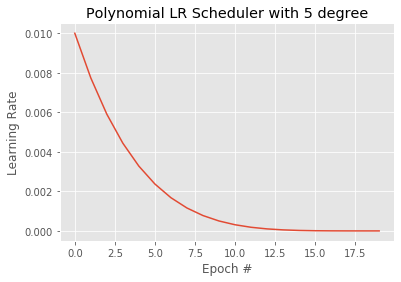

In [45]:
poly_decay = PolynomialDecay(power=5)

for i in range(EPOCHS):
    print(poly_decay(i))
    
poly_decay.plot()

In [46]:
# three sets of learning rate decays which can be used along with SGD optimizer 
class KerasDecay():
    """ Keras decaying of the learning rate """
    def __init__(self, initLR=INIT_LR, decay=None):
        self.initLR = initLR
        if decay is None: # then use a default decay value 
            self.decay = self.initLR / BATCH_SIZE
            print(f"using the default decay rate: {self.decay}")
        else:
            self.decay = decay 
        self.iterations = TRAIN_SAMPLES / BATCH_SIZE # it is steps per epoch or, total num of batches per epoch 
        self.epochs = []
        self.lrs = []
        
    def __call__(self, epoch):
        """ compute the new learning rate based on every batch update """
        lr = self.initLR * (1. / (1. + self.decay * (epoch *self.iterations))) 
        
        # save the epochs and lrs for plotting 
        self.epochs.append(epoch)
        self.lrs.append(lr)
        return float(lr)
    
    def plot(self):        
        plt.style.use("ggplot")
        plt.figure()
        plt.plot(self.epochs, self.lrs)
        plt.title(f"Keras default LR Scheduler")
        plt.xlabel("Epoch #")
        plt.ylabel("Learning Rate")

0.01
0.009876543209876545
0.009756097560975611
0.009638554216867469
0.009523809523809523
0.009411764705882354
0.009302325581395349
0.009195402298850576
0.00909090909090909
0.008988764044943821
0.008888888888888889
0.008791208791208791
0.008695652173913045
0.008602150537634409
0.00851063829787234
0.008421052631578947
0.008333333333333333
0.008247422680412371
0.008163265306122448
0.00808080808080808


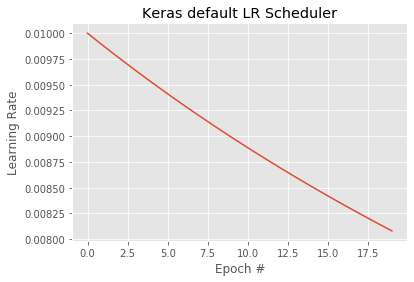

In [47]:
#keras_decay = KerasDecay(decay=1e-2)
#keras_decay = KerasDecay()
keras_decay = KerasDecay(decay = 1e-2 / 20)

for i in range(EPOCHS):
    print(keras_decay(i))
    
keras_decay.plot()